Exercícios - Módulo 7 - 
Nome:  Rodolfo Oliveira Ruback

# Exercícios:

<br>

1 - Importe o arquivo "dataframe_exercicio_modulo_7.csv" em um dataframe - df - do Pandas.

<br>

2 - Quais as dimensões do dataframe?

<br>

3 - Qual o tipo das variáveis?

<br>

4 - Existem variáveis faltantes no dataset? Quais?

<br>


5 - Exiba todas as categorias das variáveis 'estado_civil', 'cor' e 'sexo'. Você consegue detectar algum problema?

<br>

6 - Faça um tratamento nas variáveis faltantes.

<br>

7 - Aplique uma transformação "MinMax" na variável  'tempo_educacao'e uma transformação "StandardScaler" na variável 'horas_por_semana'.

<br>

8 - Aplique ohe-hot-encoding nas variáveis 'estado_civil', 'cor' e 'sexo'.

<br>

9 - Detecte e elimine os outliers da variável 'idade'.

<br>


10 - Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercício 1 

In [3]:
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")
df.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN


## Exercício 2 - Dimensões

In [4]:
df.shape


(29170, 9)

##  Exercício 3 - Tipos de Variaveis

In [5]:
df.dtypes

idade               float64
tempo_educacao        int64
estado_civil         object
cor                  object
sexo                 object
horas_por_semana      int64
salario_anual        object
nome                float64
dívida              float64
dtype: object

## Exercício 4 - Variáveis faltantes:

In [6]:
df.isnull().sum()

idade                  99
tempo_educacao          0
estado_civil            0
cor                     0
sexo                    0
horas_por_semana        0
salario_anual           0
nome                29170
dívida              29170
dtype: int64

In [7]:
((df.isnull().sum()/df.shape[0])*100).round(2) # Percentual de variáveis faltantes por categorias

idade                 0.34
tempo_educacao        0.00
estado_civil          0.00
cor                   0.00
sexo                  0.00
horas_por_semana      0.00
salario_anual         0.00
nome                100.00
dívida              100.00
dtype: float64

## Exercício 5 - Exiba todas as categorias das variáveis 'estado_civil', 'cor' e 'sexo'. Você consegue detectar algum problema?


In [8]:
df['estado_civil'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced', 'Separated',
       'Married-AF-spouse', 'Widowed', 'Married-spouse-absent'],
      dtype=object)

In [9]:
df['cor'].unique()

array(['White', 'Black', 'Other', 'Asian-Pac-Islander',
       'Amer-Indian-Eskimo'], dtype=object)

In [10]:
df['sexo'].unique()

array(['Male', 'Female', '?'], dtype=object)

In [11]:
# Nota-se que apesar da categoria Sexo não possuir nenhum NaN, temos casos onde está atribuido '?'. 
#Qual seria a quantificação nesse caso? 
df.sexo.value_counts()

Male      18181
Female     9052
?          1937
Name: sexo, dtype: int64

## Exercício 6 - tratamento das variáveis faltantes

In [12]:
# Eliminando as colunas de divida e nome que são compostas de NaN 100%

df2 = df.drop(['nome', 'dívida'], axis=1)
df2

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual
0,39.0,13,Never-married,White,Male,40,<=50K
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K
2,38.0,9,Divorced,White,Male,40,<=50K
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K
...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K
29167,58.0,9,Widowed,White,Female,40,<=50K
29168,22.0,9,Never-married,White,Male,20,<=50K


In [13]:
# Em relação a variável idade, irei colocar o valor médio onde tivermos dados faltantes!
media_idade = df2.idade.mean()
media_idade


38.654088266657496

In [14]:
df2['idade'] = df2['idade'].fillna(media_idade)

In [15]:
df2.idade.isnull().sum()

0

In [16]:
# Substituir os dados com '?' em sexo, pela moda da categoria.
moda_sexo = df.sexo.value_counts().idxmax()
moda_sexo


'Male'

In [17]:
df2['sexo'] = df2['sexo'].replace(['?'], moda_sexo)


In [18]:
df2.sexo.value_counts()

Male      20118
Female     9052
Name: sexo, dtype: int64

## Exercício 7 - Aplicando transformações


In [18]:
# Analisando o Histograma de tempo_educacao

Informações ~ tempo_educacao:

count    29170.000000
mean        10.169455
std          2.394966
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: tempo_educacao, dtype: float64


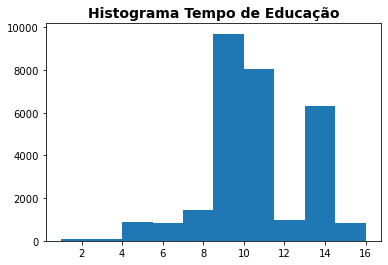

In [19]:
print("Informações ~ tempo_educacao:\n")
print(df2.tempo_educacao.describe())

plt.title("Histograma Tempo de Educação", fontsize = 14, fontweight = 'bold')
plt.hist(df2.tempo_educacao)
plt.show()

In [20]:
# Transformação min_max - Média de 10.16, com um desvio padrão de 2.49. Cerca de 2,5% 
X = df2.tempo_educacao.values
M = np.max(X)
m = np.min(X)
X_minmax = (X-m)/(M-m)

Informações ~ tempo_educacao:

count    29170.000000
mean         0.611297
std          0.159664
min          0.000000
25%          0.533333
50%          0.600000
75%          0.733333
max          1.000000
dtype: float64


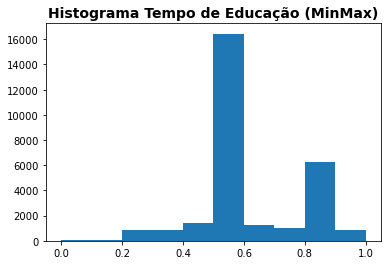

In [21]:
print("Informações ~ tempo_educacao:\n")
print(pd.Series(X_minmax).describe())

plt.title("Histograma Tempo de Educação (MinMax)", fontsize = 14, fontweight = 'bold')
plt.hist(X_minmax)
plt.show()

In [22]:
# Transformação padrão para a variável horas_por_semana
X2 = df2.horas_por_semana.values
Md = np.mean(X2)
S = np.std(X2)
X_normPadrao = (X2-Md)/S



Informações ~ horas_por_semana:

count    2.917000e+04
mean     1.914597e-16
std      1.000017e+00
min     -3.176917e+00
25%     -3.605983e-02
50%     -3.605983e-02
75%      3.666142e-01
max      4.715494e+00
dtype: float64


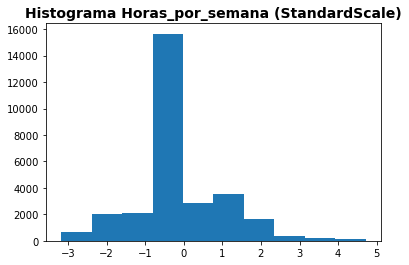

In [23]:
print("Informações ~ horas_por_semana:\n")
print(pd.Series(X_normPadrao).describe())

plt.title("Histograma Horas_por_semana (StandardScale)", fontsize = 14, fontweight = 'bold')
plt.hist(X_normPadrao)
plt.show()

## Exercício  8  - One Hot Coding nas variáveis: "estado_civil", "cor" e "sexo"


Primeiro aplicando na variável estado_civil

In [24]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [25]:
variavel_ohe = df2.estado_civil.values.reshape(-1,1)
ohe.fit(variavel_ohe)

OneHotEncoder()

In [26]:
ohe.transform(variavel_ohe)

<29170x7 sparse matrix of type '<class 'numpy.float64'>'
	with 29170 stored elements in Compressed Sparse Row format>

In [27]:
ohe.transform(variavel_ohe).toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [28]:
ohe.categories_

[array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object)]

In [29]:
dataframe_OHE1 = pd.DataFrame(ohe.transform(variavel_ohe).toarray(), columns = ohe.categories_[0].tolist())
dataframe_OHE1

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
29165,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29166,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29167,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29168,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
pd.concat([df2, dataframe_OHE1], axis = 1)

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,39.0,13,Never-married,White,Male,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,38.0,9,Divorced,White,Male,40,<=50K,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29167,58.0,9,Widowed,White,Female,40,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29168,22.0,9,Never-married,White,Male,20,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Repetindo o processo para a variável 'sexo'


In [31]:
variavel_ohe2 = df2.sexo.values.reshape(-1,1)
ohe.fit(variavel_ohe2)

OneHotEncoder()

In [32]:
ohe.transform(variavel_ohe2)

<29170x2 sparse matrix of type '<class 'numpy.float64'>'
	with 29170 stored elements in Compressed Sparse Row format>

In [33]:
ohe.transform(variavel_ohe2).toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [34]:
ohe.categories_

[array(['Female', 'Male'], dtype=object)]

In [35]:
dataframe_OHE2 = pd.DataFrame(ohe.transform(variavel_ohe2).toarray(), columns = ohe.categories_[0].tolist())
dataframe_OHE2

,Female,Male
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
29165,1.0,0.0
29166,0.0,1.0
29167,1.0,0.0
29168,0.0,1.0


In [36]:
pd.concat([df2, dataframe_OHE1, dataframe_OHE2], axis = 1)

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Female,Male
0,39.0,13,Never-married,White,Male,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,38.0,9,Divorced,White,Male,40,<=50K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
29167,58.0,9,Widowed,White,Female,40,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
29168,22.0,9,Never-married,White,Male,20,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Repetindo o processo para a variavel 'cor'

In [37]:
variavel_ohe3 = df2.cor.values.reshape(-1,1)
ohe.fit(variavel_ohe3)

OneHotEncoder()

In [38]:
ohe.transform(variavel_ohe3)

<29170x5 sparse matrix of type '<class 'numpy.float64'>'
	with 29170 stored elements in Compressed Sparse Row format>

In [39]:
ohe.transform(variavel_ohe3).toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [40]:
ohe.categories_

[array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
        'White'], dtype=object)]

In [41]:
dataframe_OHE3 = pd.DataFrame(ohe.transform(variavel_ohe3).toarray(), columns = ohe.categories_[0].tolist())
dataframe_OHE3

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
29165,0.0,0.0,0.0,0.0,1.0
29166,0.0,0.0,0.0,0.0,1.0
29167,0.0,0.0,0.0,0.0,1.0
29168,0.0,0.0,0.0,0.0,1.0


In [42]:
pd.concat([df2, dataframe_OHE1, dataframe_OHE2, dataframe_OHE3], axis = 1)

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,...,Never-married,Separated,Widowed,Female,Male,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39.0,13,Never-married,White,Male,40,<=50K,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,38.0,9,Divorced,White,Male,40,<=50K,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
29167,58.0,9,Widowed,White,Female,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
29168,22.0,9,Never-married,White,Male,20,<=50K,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Exercício 9 - Detectar e eliminar os outliers da variável idade



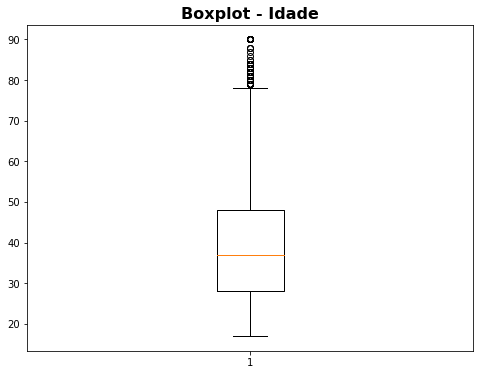

In [43]:
# Analisando a presença de outliers com um bloxpot
plt.figure(figsize=[8,6])
plt.title("Boxplot - Idade", fontsize = 16, fontweight = 'bold')
plt.boxplot(df2.idade)
plt.show()

In [44]:
# usando uma função para detectar os outliers

def detecta_outlier(x, limite = 1.5):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

In [45]:
df2['outlier_idade'] = detecta_outlier(df2.idade)
df2

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,outlier_idade
0,39.0,13,Never-married,White,Male,40,<=50K,0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0
2,38.0,9,Divorced,White,Male,40,<=50K,0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0
...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0
29167,58.0,9,Widowed,White,Female,40,<=50K,0
29168,22.0,9,Never-married,White,Male,20,<=50K,0


In [46]:
# Filtrando os valores que são outliers
df2.loc[(df2.outlier_idade == 1)].round(2)


,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,outlier_idade
61,79.0,10,Married-civ-spouse,White,Male,20,<=50K,1
193,90.0,9,Never-married,Black,Male,40,<=50K,1
380,80.0,9,Widowed,White,Male,24,<=50K,1
826,81.0,9,Married-civ-spouse,White,Male,30,<=50K,1
936,90.0,9,Never-married,White,Female,40,<=50K,1
...,...,...,...,...,...,...,...,...
28517,80.0,12,Married-civ-spouse,White,Male,4,<=50K,1
28535,82.0,9,Married-civ-spouse,White,Male,20,<=50K,1
28920,90.0,9,Widowed,White,Female,25,<=50K,1
28996,90.0,4,Married-civ-spouse,White,Male,40,<=50K,1


In [47]:
# Eliminando os valores onde existem os outliers de idade
df2.drop(df2.loc[(df2.outlier_idade == 1)].index, inplace =True)
df2

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,outlier_idade
0,39.0,13,Never-married,White,Male,40,<=50K,0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0
2,38.0,9,Divorced,White,Male,40,<=50K,0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0
...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0
29167,58.0,9,Widowed,White,Female,40,<=50K,0
29168,22.0,9,Never-married,White,Male,20,<=50K,0


### Exercício 10 -  Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.

In [50]:
def preprocessamento(df, cols_numericas, cols_categoricas, cols_outlier, cols_OHE):
    dff = df.copy()
    temp = (df.isnull().sum()/df.shape[0])>=0.8
    variaveis_80percFaltantes = temp.loc[temp == True].index.tolist()
    for v in variaveis_80percFaltantes: # Dropando as variáveis com mais de 80% dos dados NaN
        dff = dff.drop(v, axis = 1)
      
    cols_numericas = list(set(cols_numericas).intersection(set(dff.columns.tolist())))
    cols_categoricas = list(set(cols_categoricas).intersection(set(dff.columns.tolist())))
    
    # Caso específico da variável sexo:
    moda_sexo = dff.sexo.value_counts().idxmax()
    dff['sexo'] = dff['sexo'].replace(['?'], moda_sexo)
    
    for v in cols_numericas: # Colunas numericas utiliza a média
        dff[v] = dff[v].fillna(dff[v].mean())
        
    for v in cols_categoricas: #Colunas categoricas utiliza a moda
        mode_v = dff[v].value_counts().idxmax()
        dff[v] = dff[v].fillna(mode_v)
        
    for v in cols_OHE:
        variavel_ohe = dff[v].values.reshape(-1,1)
        ohe.fit(variavel_ohe)
        ohe.transform(variavel_ohe)
        ohe.transform(variavel_ohe).toarray()
        dataframe_OHE = pd.DataFrame(ohe.transform(variavel_ohe).toarray(), columns = ohe.categories_[0].tolist())
        dff = pd.concat([dff, dataframe_OHE], axis = 1)
        
    for v in cols_outlier:
        dff['outlier_idade'] = detecta_outlier(dff[v]) # Descobrindo os outliers com a função pré criada
        dff.drop(dff.loc[(dff.outlier_idade == 1)].index, inplace =True) # excluindo os outliers

    return dff
        
cols_numericas = ['idade', 'tempo_educacao', 'horas_por_semana', 'dívida']
cols_categoricas = ['estado_civil', 'cor', 'sexo', 'nome', 'salario_anual' ]
cols_outlier = ['idade']
cols_OHE = ['estado_civil', 'cor', 'sexo']
df_limpo = preprocessamento(df = df, cols_numericas = cols_numericas, cols_categoricas = cols_categoricas, cols_outlier = cols_outlier, cols_OHE = cols_OHE)


In [51]:
df_limpo

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,...,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,outlier_idade
0,39.0,13,Never-married,White,Male,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,38.0,9,Divorced,White,Male,40,<=50K,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
29167,58.0,9,Widowed,White,Female,40,<=50K,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
29168,22.0,9,Never-married,White,Male,20,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
